In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Load Pre_Cleaned Data 

In [2]:
df = pd.read_csv('Data/food sales.csv')
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


# Initial Exploration

What is my dataset like?

In [3]:
df.shape

(8523, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   object 
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Size           8523 non-null   object 
 6   Outlet_Location_Type  8523 non-null   object 
 7   Outlet_Type           8523 non-null   object 
 8   Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), object(5)
memory usage: 599.4+ KB


In [7]:
df.describe(include = 'all').round(3)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000,8523,8523.000,8523,8523.000,8523,8523,8523,8523.000
unique,NaN,2,NaN,16,NaN,3,3,4,NaN
top,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,NaN,5517,NaN,1232,NaN,5203,3350,5577,NaN
mean,12.858,NaN,0.066,NaN,140.993,NaN,NaN,NaN,2181.289
std,4.226,NaN,0.052,NaN,62.275,NaN,NaN,NaN,1706.500
min,4.555,NaN,0.000,NaN,31.290,NaN,NaN,NaN,33.290
25%,9.310,NaN,0.027,NaN,93.826,NaN,NaN,NaN,834.247
50%,12.858,NaN,0.054,NaN,143.013,NaN,NaN,NaN,1794.331
75%,16.000,NaN,0.095,NaN,185.644,NaN,NaN,NaN,3101.296


Data Types:

Numerical data: 

continuous - Item_Weight, Item_Visibility, Item_MRP, Item_Outlet_Sales

Categorical data:

ordinal - Outlet_Size

nominal - Item_Fat_Contentj, Item_Type, Outlet_Type, Outlet_Location_Type


# Visualizations for EDA

Univariate Visuals: Explore the distribution of each column of data

Histograms

boxplots

Bar charts

Multivariate Visuals: Explore relationships between variables and differences in groups

Scatterplots

Correlation Heatmaps

Multivariate bar charts or boxplots



## Univariate Visuals

### Bar Charts: Plotting Categorical Frequencies

In [8]:
# plot 1: The distribution of Item_Fat_Content
fat_counts = df['Item_Fat_Content'].value_counts().sort_values()

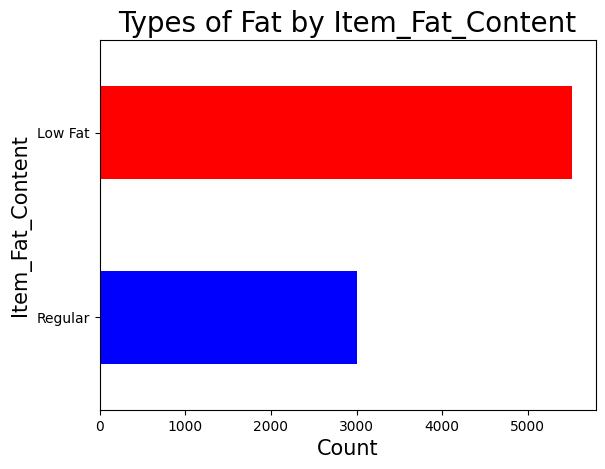

Regular    3006
Low Fat    5517
Name: Item_Fat_Content, dtype: int64

In [9]:
fat_counts.plot(kind = 'barh', color = ['blue','red'])
plt.title('Types of Fat by Item_Fat_Content', fontsize = 20)
plt.ylabel('Item_Fat_Content', fontsize = 15)
plt.xlabel('Count', fontsize = 15)

#Show your figure
plt.show()

#Display the count chart below the plot
fat_counts

In [11]:
# plot 2: distribution of Item_Type
type_counts = df['Item_Type'].value_counts().sort_values()
type_counts

Seafood                    64
Breakfast                 110
Starchy Foods             148
Others                    169
Hard Drinks               214
Breads                    251
Meat                      425
Soft Drinks               445
Health and Hygiene        520
Baking Goods              648
Canned                    649
Dairy                     682
Frozen Foods              856
Household                 910
Snack Foods              1200
Fruits and Vegetables    1232
Name: Item_Type, dtype: int64

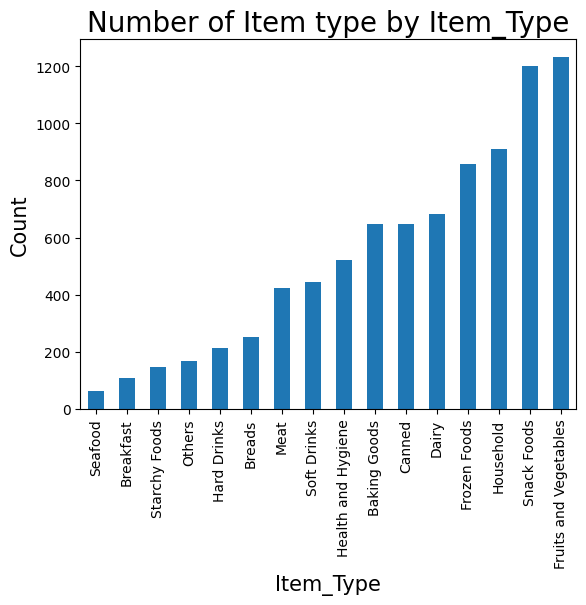

In [14]:
type_counts.plot(kind = 'bar')
plt.title('Number of Item type by Item_Type', fontsize = 20)
plt.xticks(rotation = 90)
plt.ylabel('Count', fontsize = 15)
plt.xlabel('Item_Type', fontsize = 15)

#Show your figure
plt.show()


In [15]:
# plot 3: distribution of 	Outlet_Size
size_counts = df['Outlet_Size'].value_counts().sort_values()
size_counts

High       932
Small     2388
Medium    5203
Name: Outlet_Size, dtype: int64

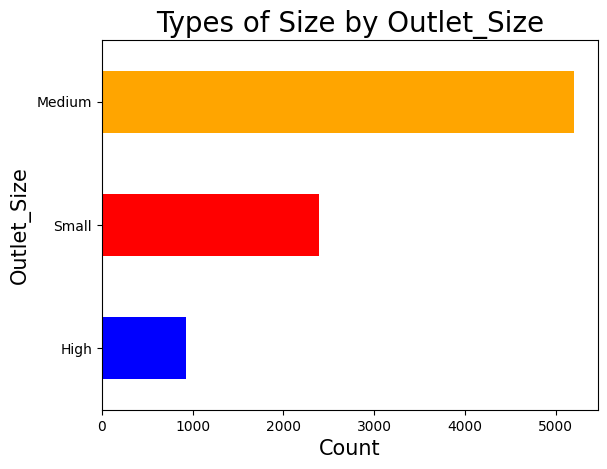

In [17]:
size_counts.plot(kind = 'barh', color = ['blue','red', 'orange'])
plt.title('Types of Size by Outlet_Size', fontsize = 20)
plt.ylabel('Outlet_Size', fontsize = 15)
plt.xlabel('Count', fontsize = 15)

#Show your figure
plt.show()

In [18]:
# plot 4: distribution of Outlet_Location_Type
location_type_counts = df['Outlet_Location_Type'].value_counts().sort_values()
location_type_counts

Tier 1    2388
Tier 2    2785
Tier 3    3350
Name: Outlet_Location_Type, dtype: int64

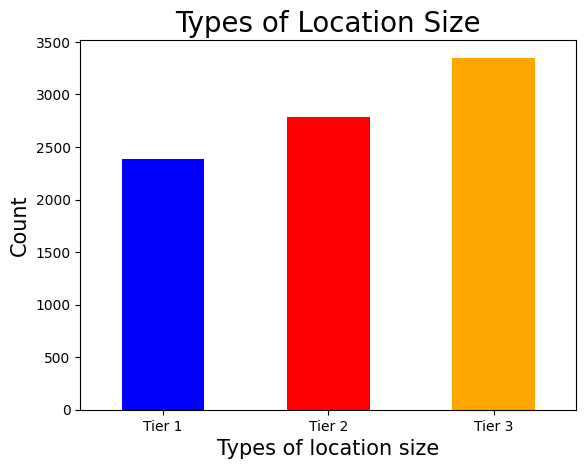

In [23]:
location_type_counts.plot(kind = 'bar', color = ['blue','red', 'orange'])
plt.title('Types of Location Size', fontsize = 20)
plt.xticks(rotation = 360)
plt.ylabel('Count', fontsize = 15)
plt.xlabel('Types of location size', fontsize = 15)

#Show your figure
plt.show()

In [20]:
# plot 5: distribution of Outlet_Type
outlet_type_counts = df['Outlet_Type'].value_counts().sort_values()
outlet_type_counts

Supermarket Type2     928
Supermarket Type3     935
Grocery Store        1083
Supermarket Type1    5577
Name: Outlet_Type, dtype: int64

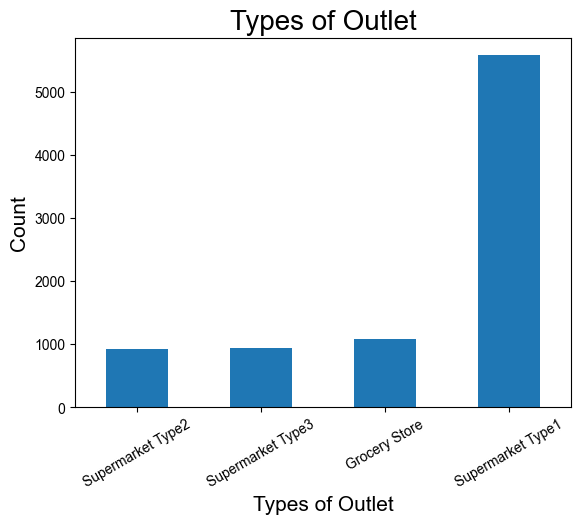

In [24]:
outlet_type_counts.plot(kind = 'bar')
plt.style.use('seaborn')
plt.title('Types of Outlet', fontsize = 20)
plt.xticks(rotation = 30)
plt.ylabel('Count', fontsize = 15)
plt.xlabel('Types of Outlet', fontsize = 15)

#Show your figure
plt.show()

### Histograms: Plotting Continuous Distributions